# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### [추가] 날짜 데이터 파싱

In [6]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
data['datetime'] = data['datetime'].astype('datetime64')

In [8]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [9]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

In [40]:
data["season"] = data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

### 가설설정

1. 계절에 따라 수요량의 변화가 있을 것이다.(봄가을에 증가하고 여름겨울에 감소)

2. 날씨에 따라 수요량의 변화가 있을 것.(맑은 날일수록 증가, 눈 비등 날이 흐릴수록 감소)

3. 휴일 여부에 따라 수요량의 변화가 있을 것.(휴일에 증가, 평일에 감소)

4. 평일에 이용하는 사람은 회원일 것이다.

5. 기온이 너무 낮거나 너무 높을 때는 수요가 없을 것이다.

6. 날씨가 안좋은 날 이용하는 사람은 회원이 더 많을 것이다.


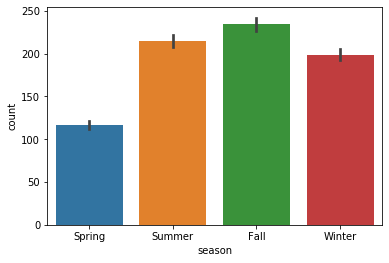

In [41]:
sns.barplot(x='season', y='count', data=data)

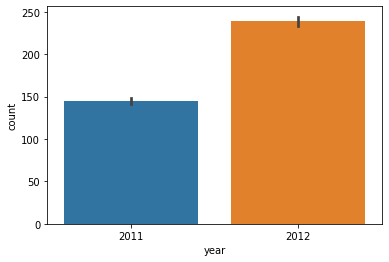

In [11]:
sns.barplot(x='year', y='count', data=data)

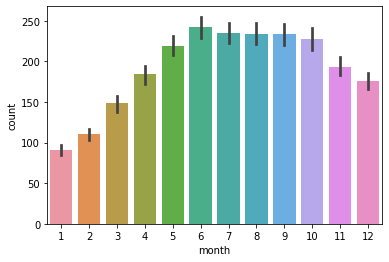

In [12]:
sns.barplot(x='month', y='count', data=data)

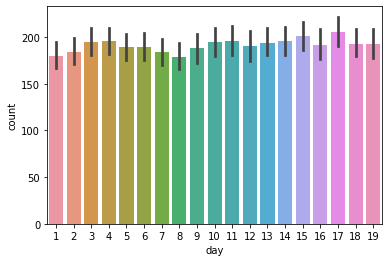

In [13]:
sns.barplot(x='day', y='count', data=data)

### 회원 비회원

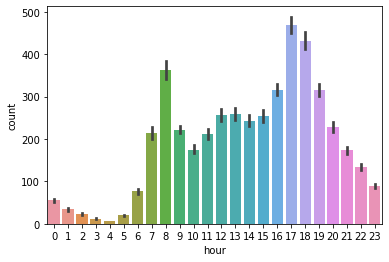

In [15]:
sns.barplot(x='hour', y='count', data=data)

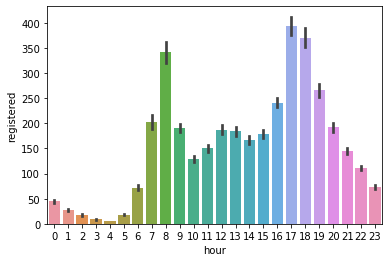

In [19]:
sns.barplot(x='hour', y='registered', data=data)

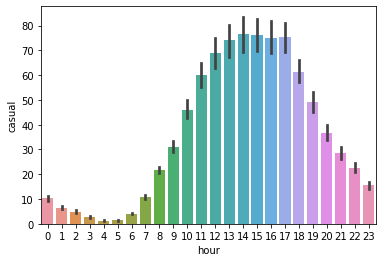

In [20]:
sns.barplot(x='hour', y='casual', data=data)

[Text(22.575000000000003, 0.5, 'Users Count'),
 Text(0.5, 17.200000000000017, 'Hour Of The Day'),
 Text(0.5, 1, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

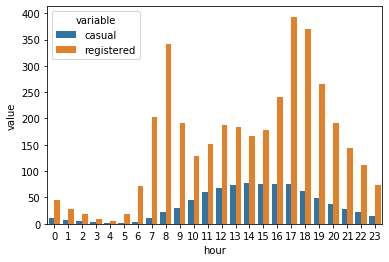

In [48]:
hourTransformed = pd.melt(data[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.barplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

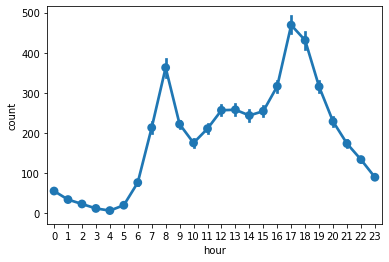

In [50]:
sns.pointplot(x='hour', y='count', data=data)

[Text(22.575000000000003, 0.5, 'Users Count'),
 Text(0.5, 17.200000000000017, 'Hour Of The Day'),
 Text(0.5, 1, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

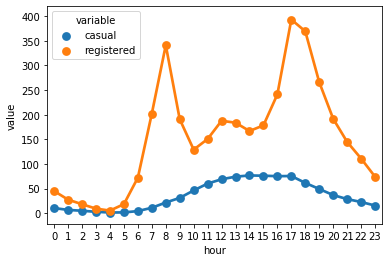

In [49]:
hourTransformed = pd.melt(data[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

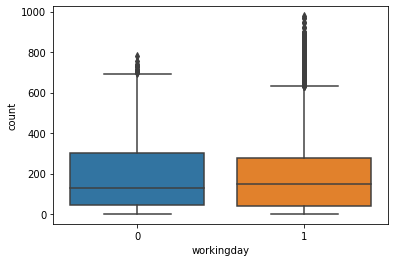

In [23]:
sns.boxplot(x='workingday', y='count', data=data)

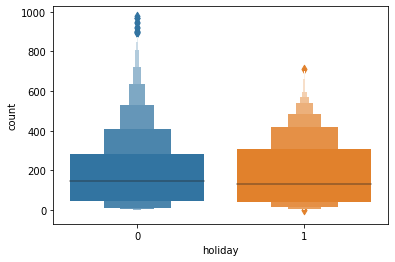

In [25]:
sns.boxenplot(x='holiday', y='count', data=data)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

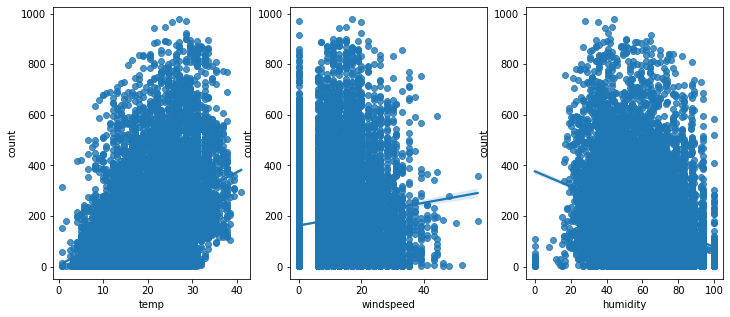

In [29]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=data,ax=ax1)
sns.regplot(x="windspeed", y="count", data=data,ax=ax2)
sns.regplot(x="humidity", y="count", data=data,ax=ax3)

[Text(22.700000000000003, 0.5, 'Users Count'),
 Text(0.5, 584.4347826086957, 'Hour Of The Day'),
 Text(0.5, 1, 'Average Users Count By Hour Of The Day Across Season'),
 None]

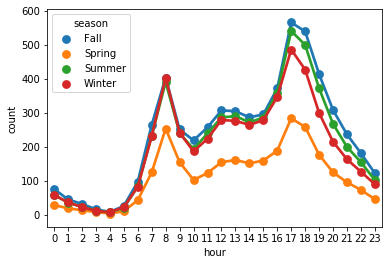

In [44]:
hourAggregated = pd.DataFrame(data.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


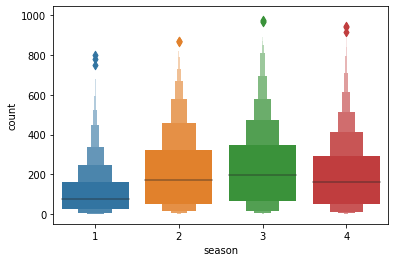

In [38]:
sns.boxenplot(x='se', y='count', data=data)

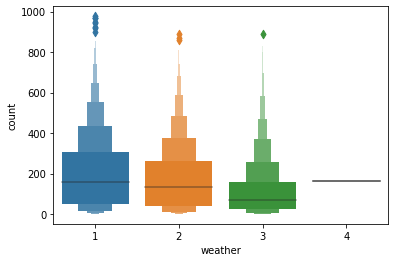

In [39]:
sns.boxenplot(x='weather', y='count', data=data)